In [5]:
import matplotlib
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("pdf", "svg")
from src.preprocessing import complete_preprocessing
import seaborn as sns

In [6]:
# turn list of snake case strings into upper case text with spaces (Special cases of GDP, AI, and ML are handeled as well)
def parse_labels(labels):
    parsed_labels = []

    for label in labels:
        parsed = "\n".join([word.capitalize() for word in label.split('_')]).replace('Gdp', 'GDP').replace('Usd', 'USD').replace('Ai\nOr\nMl', 'AI or ML')
        parsed_labels.append(parsed)

    return parsed_labels

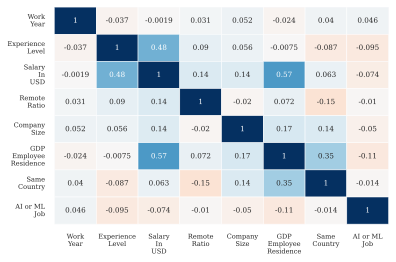

In [7]:
# load data and calculate correlation coefficients using spearman
salaries = complete_preprocessing()
salaries.drop(['salary', 'gdp_company_location'], axis=1, inplace=True)
correlation_coefficients = salaries.corr(method='spearman')

# parse tick labels
labels = parse_labels(correlation_coefficients.columns)

# plot using seaborn
sns.set(font_scale=.6)
matplotlib.rcParams['font.family'] = 'Serif'
#plt.yticks(np.arange(7)+10, ha='center')
heatmap = sns.heatmap(correlation_coefficients,
                      annot=True,
                      cmap='RdBu',
                      cbar=False,
                      vmin=-1,
                      vmax=1,
                      linewidths=.5,
                      xticklabels=labels,
                      yticklabels=labels)


matplotlib.pyplot.savefig('../doc/fig/correlations.pdf', bbox_inches='tight')